In [141]:
import pandas as pd
import generate_data
import matplotlib.pyplot as plt



In [142]:
dataframe = pd.read_csv('troop_movements.csv')
print(dataframe)

               timestamp  unit_id           unit_type empire_or_resistance  \
0    2024-07-11 10:34:06        1        stormtrooper           resistance   
1    2024-07-11 10:34:05        2             unknown               empire   
2    2024-07-11 10:34:04        3               at-at           resistance   
3    2024-07-11 10:34:03        4              x-wing               empire   
4    2024-07-11 10:34:02        5               at-at               empire   
..                   ...      ...                 ...                  ...   
995  2024-07-11 10:17:31      996               at-st           resistance   
996  2024-07-11 10:17:30      997             unknown               empire   
997  2024-07-11 10:17:29      998  resistance_soldier           resistance   
998  2024-07-11 10:17:28      999             unknown               empire   
999  2024-07-11 10:17:27     1000              x-wing           resistance   

     location_x  location_y  destination_x  destination_y homew

In [143]:
#create grouped data showing empire vs resistance

grouped_data = dataframe[['empire_or_resistance']].value_counts().reset_index()




display(grouped_data)


,empire_or_resistance,count
0,empire,511
1,resistance,489


In [144]:
#counts of characters by homeworld
grouped_data2 = dataframe[['homeworld']].value_counts().reset_index()

display(grouped_data2)

,homeworld,count
0,Mon Cala,40
1,Chandrila,31
2,Haruun Kal,31
3,Aleen Minor,30
4,Eriadu,29
5,Bestine IV,29
6,Cerea,28
7,Sullust,28
8,Tatooine,27
9,Mirial,27


In [145]:
grouped_data3 = dataframe[['unit_type']].value_counts().reset_index()

display(grouped_data3)

,unit_type,count
0,tie_fighter,134
1,unknown,133
2,at-at,131
3,x-wing,129
4,at-st,124
5,resistance_soldier,123
6,tie_silencer,115
7,stormtrooper,111


In [146]:
def determine_value(row): 
    if row['empire_or_resistance'] == 'resistance': 
        return True
    elif row['empire_or_resistance'] == 'empire': 
        return False

dataframe['is_resistance'] = dataframe.apply(determine_value,axis=1)

display(dataframe.head())

,timestamp,unit_id,unit_type,empire_or_resistance,location_x,location_y,destination_x,destination_y,homeworld,is_resistance
0,2024-07-11 10:34:06,1,stormtrooper,resistance,5,1,9,8,Dathomir,True
1,2024-07-11 10:34:05,2,unknown,empire,10,9,5,5,Dorin,False
2,2024-07-11 10:34:04,3,at-at,resistance,6,5,4,7,Kashyyyk,True
3,2024-07-11 10:34:03,4,x-wing,empire,1,5,9,7,Kashyyyk,False
4,2024-07-11 10:34:02,5,at-at,empire,5,3,5,8,Socorro,False


  empire_or_resistance  count
0               empire    511
1           resistance    489


<Axes: xlabel='empire_or_resistance', ylabel='count'>

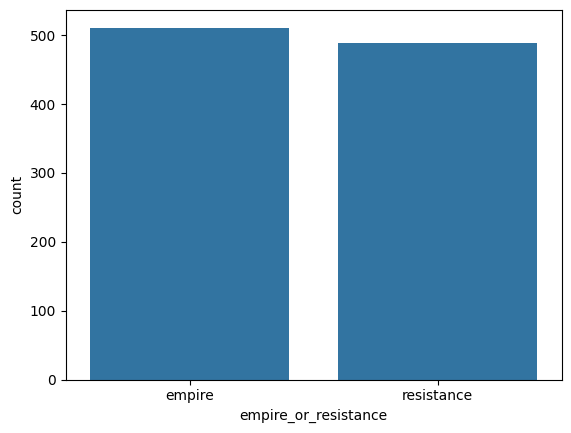

In [147]:
import seaborn as sns
#import matplotlib as plt

print(grouped_data)

sns.barplot(x = 'empire_or_resistance', y = 'count', data=grouped_data)



In [148]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [149]:
# Convert categorical features to numeric using pd.get_dummies
df = pd.get_dummies(dataframe, columns=['homeworld', 'unit_type'])
print(df.head())

             timestamp  unit_id empire_or_resistance  location_x  location_y  \
0  2024-07-11 10:34:06        1           resistance           5           1   
1  2024-07-11 10:34:05        2               empire          10           9   
2  2024-07-11 10:34:04        3           resistance           6           5   
3  2024-07-11 10:34:03        4               empire           1           5   
4  2024-07-11 10:34:02        5               empire           5           3   

   destination_x  destination_y  is_resistance  homeworld_Alderaan  \
0              9              8           True               False   
1              5              5          False               False   
2              4              7           True               False   
3              9              7          False               False   
4              5              8          False               False   

   homeworld_Aleen Minor  ...  homeworld_Vulpter  homeworld_Zolan  \
0                  False  ...

In [150]:
# Split the data into training and testing sets
X = df.drop(columns=['empire_or_resistance', 'is_resistance','timestamp'])
y = df['is_resistance']

In [151]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [152]:
print(X_train.shape, y_train.shape)  # Check the shapes
print(X_test.shape, y_test.shape)

(800, 55) (800,)
(200, 55) (200,)


In [153]:
# Train the decision tree model
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [154]:
# Predict on the test set
y_pred = clf.predict(X_test)

In [155]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.525


In [156]:
# Plot feature importance
feature_importances = clf.feature_importances_
features = X.columns


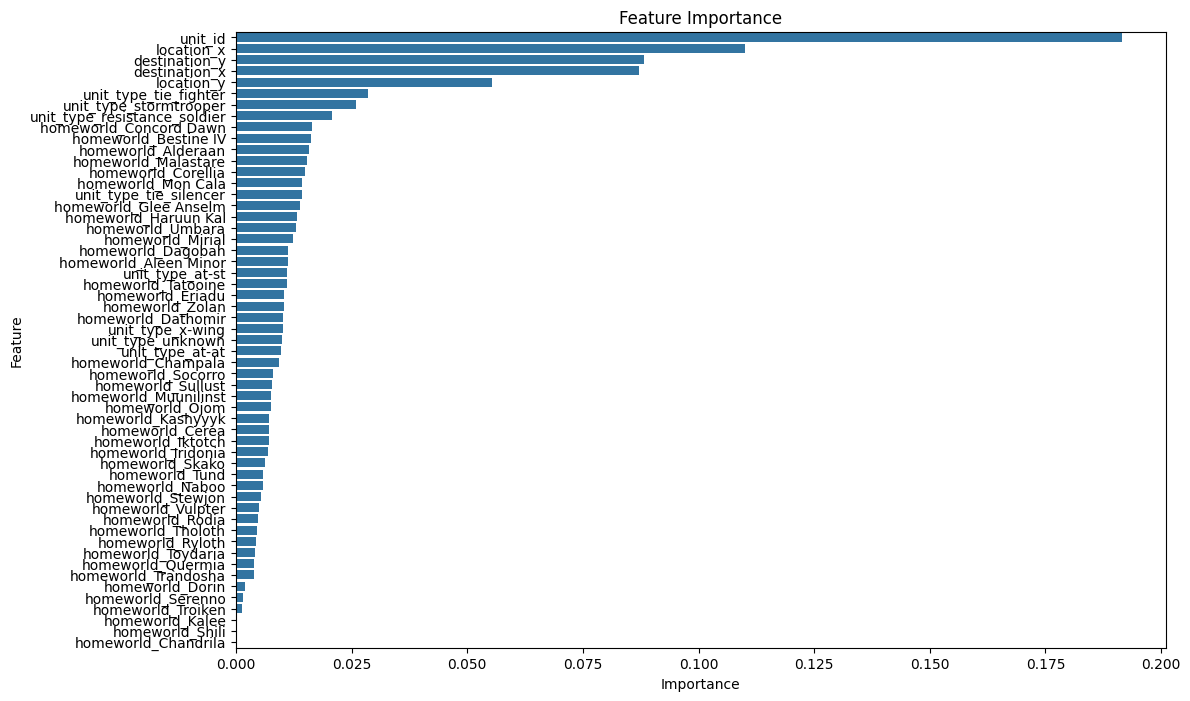

In [157]:
# Create a DataFrame for visualization
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance')
plt.show()

In [85]:
#part3

df1 = pd.read_csv('troop_movements10m.csv')



In [86]:


def determine_val(row): 
    if row['unit_type'] == 'invalid_unit': 
        return "Unknown"
    else:
        return row['unit_type']


df1['unit_type'] = df1.apply(determine_val,axis=1)



In [91]:
display(df1.tail(5))

,timestamp,unit_id,unit_type,location_x,location_y,destination_x,destination_y,homeworld
9999995,2023-02-18 10:26:20,9999996,resistance_soldier,6.0,6.0,1,3,Troiken
9999996,2023-02-18 10:26:19,9999997,tie_silencer,8.0,6.0,2,0,Kashyyyk
9999997,2023-02-18 10:26:18,9999998,tie_fighter,7.0,7.0,6,4,Kashyyyk
9999998,2023-02-18 10:26:17,9999999,tie_fighter,6.0,6.0,8,8,Kalee
9999999,2023-02-18 10:26:16,10000000,Unknown,6.0,6.0,3,0,Skako


In [90]:
df1['location_x'] = df1['location_x'].ffill()
df1['location_y'] = df1['location_y'].ffill()

In [92]:
df1.tail(5)

,timestamp,unit_id,unit_type,location_x,location_y,destination_x,destination_y,homeworld
9999995,2023-02-18 10:26:20,9999996,resistance_soldier,6.0,6.0,1,3,Troiken
9999996,2023-02-18 10:26:19,9999997,tie_silencer,8.0,6.0,2,0,Kashyyyk
9999997,2023-02-18 10:26:18,9999998,tie_fighter,7.0,7.0,6,4,Kashyyyk
9999998,2023-02-18 10:26:17,9999999,tie_fighter,6.0,6.0,8,8,Kalee
9999999,2023-02-18 10:26:16,10000000,Unknown,6.0,6.0,3,0,Skako
